In [197]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import datetime
from skimage import io
import os
import random
import matplotlib.pyplot as plt
# % matplotlib inline
import glob

In [198]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Train and predict hand gesture with 2D CNN Model

In [201]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam


# model
model = Sequential()

# first conv layer
# input shape = (img_rows, img_cols, 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,120, 1))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(6, activation='softmax'))

# model summary
optimiser = Adam() 
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 118, 32)       320       
                                                                 
 batch_normalization_4 (Batc  (None, 98, 118, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 59, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 49, 59, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 57, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 47, 57, 64)      

### Training the model with the dataset

In [202]:
!unzip -q "/content/drive/MyDrive/cv img det/archive.zip"

replace data/blank/gest0_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [209]:
# Loading the Dataset

DATASET_PATH = '/content/data'

dataset_path = os.path.join(DATASET_PATH, '*')
import glob
dataset_path = glob.glob(dataset_path)
dataset_path

['/content/data/five',
 '/content/data/fist',
 '/content/data/thumbsup',
 '/content/data/blank',
 '/content/data/thumbsdown',
 '/content/data/ok']

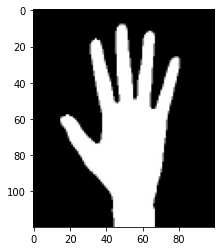

In [210]:
import cv2
image = cv2.imread('/content/data/five/hand1(1015).jpg')
image = cv2.resize(image,(100, 120))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [205]:
loaded_images = []

list_of_gestures = ['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five']

for path in range(0, len(dataset_path)):
    dataset_path = "/content/data/" + str(list_of_gestures[path])
    gesture_path = os.path.join(dataset_path, '*')
    import glob
    gest_path = glob.glob(gesture_path)
    k = 0
    for i in range(0, len(gest_path)):
        if k < 1600:
            image = cv2.imread(gest_path[i])
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = cv2.resize(gray_image,(100, 120))
            loaded_images.append(gray_image)
        k=k+1
print(len(loaded_images))

outputVectors = []
for i in range(1, 1601):
    outputVectors.append([1, 0, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 1, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 1, 0, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 1, 0, 0])
    
for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 1, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 0, 1])

print(len(outputVectors))

9600
9600


In [206]:
X = np.asarray(loaded_images)
y = np.asarray(outputVectors)
print(X.shape)
print(y.shape)

(9600, 120, 100)
(9600, 6)


In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)
print(X_train.shape)
print(X_test.shape)

(7680, 100, 120, 1)
(1920, 100, 120, 1)


In [208]:
# Training the model with data
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

# model.save("hand_gesture_recognition.h5")

Epoch 1/10
60/60 [==============================] - 5s 72ms/step - loss: 3.4517 - categorical_accuracy: 0.6682 - val_loss: 0.4268 - val_categorical_accuracy: 0.8094
Epoch 2/10
60/60 [==============================] - 4s 69ms/step - loss: 0.4314 - categorical_accuracy: 0.8165 - val_loss: 0.1961 - val_categorical_accuracy: 0.9240
Epoch 3/10
60/60 [==============================] - 4s 70ms/step - loss: 0.2879 - categorical_accuracy: 0.8659 - val_loss: 0.0826 - val_categorical_accuracy: 0.9771
Epoch 4/10
60/60 [==============================] - 4s 69ms/step - loss: 0.2582 - categorical_accuracy: 0.8850 - val_loss: 0.0712 - val_categorical_accuracy: 0.9797
Epoch 5/10
60/60 [==============================] - 4s 69ms/step - loss: 0.2178 - categorical_accuracy: 0.9092 - val_loss: 0.0644 - val_categorical_accuracy: 0.9812
Epoch 6/10
60/60 [==============================] - 4s 69ms/step - loss: 0.1956 - categorical_accuracy: 0.9202 - val_loss: 0.0228 - val_categorical_accuracy: 0.9964
Epoch 7/10

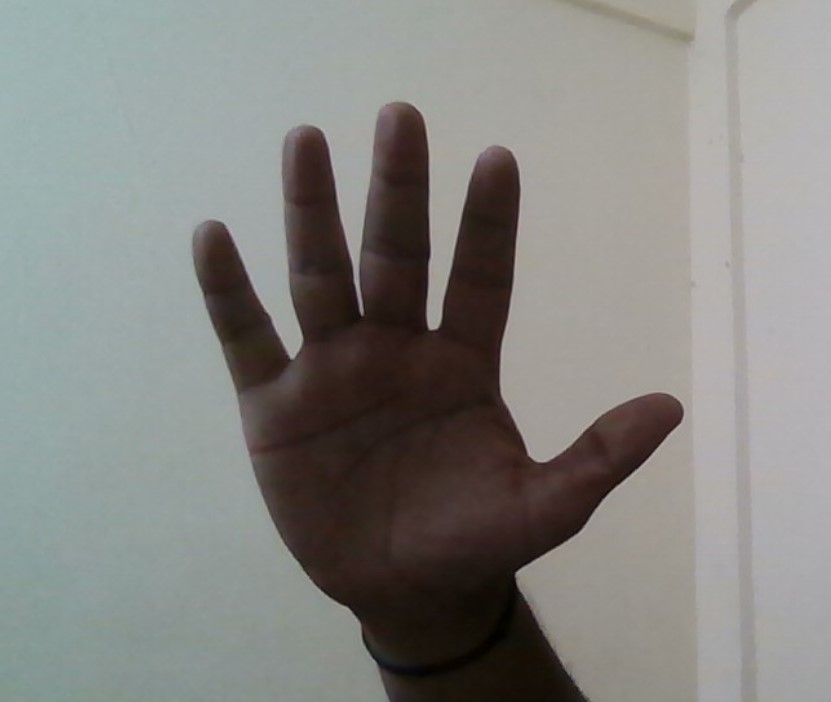

In [230]:
# Start prediction on any image
img = cv2.imread('/content/Screenshot 2022-12-10 201718.jpg')
cv2_imshow(img)

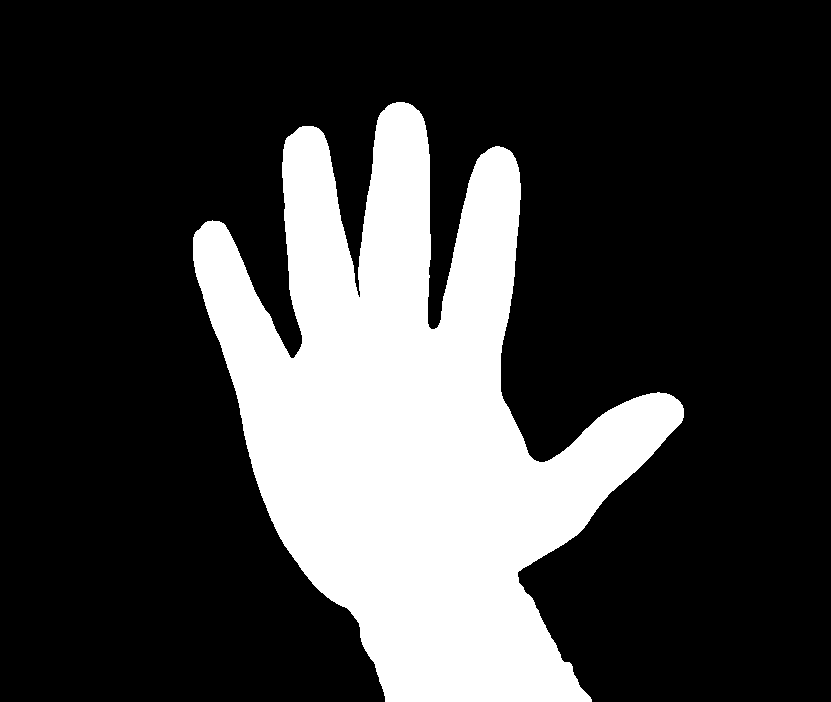

In [231]:
img = cv2.imread('/content/Screenshot 2022-12-10 201718.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (7, 7), 0)
ret, bw_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
# converting to its binary form
bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
imagem = cv2.bitwise_not(bw_img)
cv2_imshow(imagem)
cv2.waitKey(0)
cv2.destroyAllWindows()

1/1 [==============================] - 0s 16ms/step
Input image represents:Five


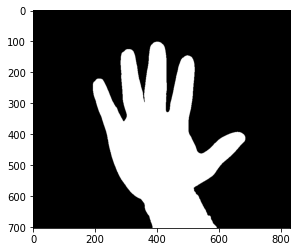

In [233]:
in_img=[]
image=imagem
original=image
image = cv2.resize(image,(100, 120))
in_img.append(image)
img = np.asarray(in_img)
img=img.reshape(img.shape[0], 100, 120, 1)
pred=np.argmax(model.predict(img))
# print(pred)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
if pred==0:
  print("Input image represents :Blank")
elif(pred==1):
  print("Input image represents:OK")
elif pred==2:
  print("Input image represents :Thumbs up")
elif(pred==4):
  print("Input image represents :Fist")
elif(pred==5):
  print("Input image represents:Five")
else :
  print("Input image represents:Thumbs Down")


In [50]:
[loss, acc] = model.evaluate(X_test,y_test,verbose=1)
print("Accuracy: " + str(acc))

60/60 [==============================] - 1s 8ms/step - loss: 0.0187 - categorical_accuracy: 0.9901
Accuracy: 0.9901041388511658


In [ ]:
# in_img=[]
# image=cv2.imread('/content/data/blank/gest0_1000.jpg')
# original=image
# image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# image = cv2.resize(image,(100, 120))
# in_img.append(image)
# img = np.asarray(in_img)
# img=img.reshape(img.shape[0], 100, 120, 1)
# pred=np.argmax(model.predict(img))
# # print(pred)
# plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
# if pred==0:
#   print("Input image represents :Blank")
# elif(pred==1):
#   print("Input image represents:OK")
# elif pred==2:
#   print("Input image represents :Thumbs up")
# elif(pred==4):
#   print("Input image represents :Fist")
# elif(pred==5):
#   print("Input image represents:Five")
# else :
#   print("Input image represents:Thumbs Down")
